In [ ]:
# キャプションを収集

In [45]:
from selenium import webdriver
browser = webdriver.Chrome('chromedriver.exe')
browser.get('https://natalie.mu/music/column/465960')

C:\Users\equal\AppData\Local\Temp\ipykernel_15668\4131951066.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Chrome('chromedriver.exe')


In [145]:
elem_caption = browser.find_element_by_class_name('NA_article_img_caption')

C:\Users\equal\AppData\Local\Temp\ipykernel_15668\3761581354.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem_article = browser.find_element_by_class_name('NA_article_embed_img-center').find_element_by_tag_name('p')
C:\Users\equal\AppData\Local\Temp\ipykernel_15668\3761581354.py:2: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem_caption = browser.find_element_by_class_name('NA_article_img_caption')


In [147]:
elem_caption.text

'この奥にあるのがオフィスです。'

In [148]:
elems_caption = browser.find_elements_by_class_name('NA_article_img_caption')

C:\Users\equal\AppData\Local\Temp\ipykernel_15668\1442424445.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  elems_caption = browser.find_elements_by_class_name('NA_article_img_caption')


In [149]:
len(elems_caption)

11

In [150]:
captions = []

for elem_caption in elems_caption:
    caption = elem_caption.text
    captions.append(caption)

In [151]:
captions

['この奥にあるのがオフィスです。',
 '平岩康佑さん',
 '左から平岩康佑さん、のっちさん。',
 '左からカワセさん、Franciscoさん。',
 '「Apex Legends」オープニング画面',
 'Franciscoさん',
 'カワセさん',
 'Franciscoさん',
 '1対1の勝負をするカワセさん（左）とFranciscoさん（右）。',
 '拍手するのっちさん。',
 '左からカワセさん、Franciscoさん。']

In [ ]:
# 画像を収集

In [238]:
from PIL import Image

In [239]:
elem = browser.find_element_by_class_name('NA_article_img_thumb')

C:\Users\equal\AppData\Local\Temp\ipykernel_15668\2878179235.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = browser.find_element_by_class_name('NA_article_img_thumb')


In [240]:
elem = elem.find_element_by_tag_name('img')

C:\Users\equal\AppData\Local\Programs\Python\Python310\lib\site-packages\selenium\webdriver\remote\webelement.py:341: UserWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  warnings.warn("find_element_by_* commands are deprecated. Please use find_element() instead")


In [241]:
url = elem.get_attribute('src')
url

'https://ogre.natalie.mu/media/news/music/2022/0217/nocchi_cr002.jpg?impolicy=hq&imwidth=640&imdensity=1'

In [242]:
import io
from urllib import request

In [243]:
f = io.BytesIO(request.urlopen(url).read())

In [244]:
f

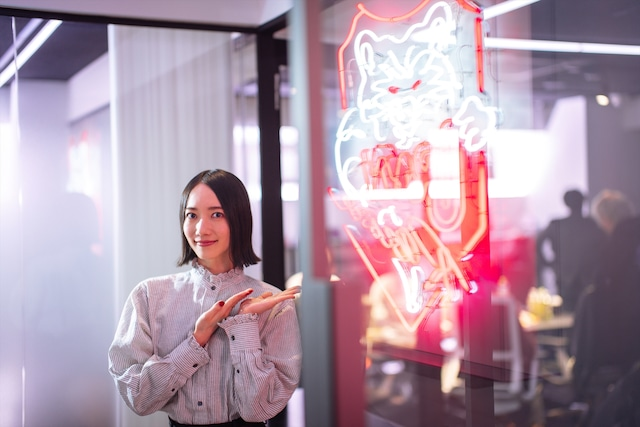

In [245]:
img = Image.open(f)
img

In [246]:
img.size

(640, 427)

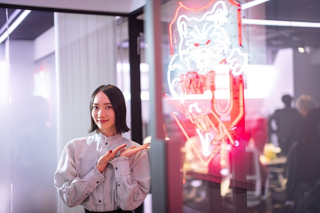

In [247]:
img.resize((320, 213))

In [248]:
elem = browser.find_element_by_class_name('NA_article_img_thumb')

elem = elem.find_element_by_tag_name('img')
url = elem.get_attribute('src')

f = io.BytesIO(request.urlopen(url).read())
img = Image.open(f)
img.save('nocchi.jpg')

C:\Users\equal\AppData\Local\Temp\ipykernel_15668\2338301729.py:1: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  elem = browser.find_element_by_class_name('NA_article_img_thumb')


In [249]:
elems = browser.find_elements_by_class_name('NA_article_img_thumb')

for index, elem in enumerate(elems):
    elem = elem.find_element_by_tag_name('img')
    url = elem.get_attribute('src')

    f = io.BytesIO(request.urlopen(url).read())
    img = Image.open(f)
    img.save('natalie_image/img{}.jpg'.format(index))

C:\Users\equal\AppData\Local\Temp\ipykernel_15668\3557584271.py:1: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead
  elems = browser.find_elements_by_class_name('NA_article_img_thumb')


In [250]:
import pandas as pd

In [262]:
images = []

for image in range(0,11):
    image = Image.open('natalie_image/img{}.jpg'.format(index))
    image.resize((160,107))
    images.append(image)

In [263]:
df = pd.DataFrame()

In [266]:
df['画像'] = images
df['キャプション'] = captions

In [267]:
df

,画像,キャプション
0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,この奥にあるのがオフィスです。
1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,平岩康佑さん
2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,左から平岩康佑さん、のっちさん。
3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,左からカワセさん、Franciscoさん。
4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,「Apex Legends」オープニング画面
5,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Franciscoさん
6,<PIL.JpegImagePlugin.JpegImageFile image mode=...,カワセさん
7,<PIL.JpegImagePlugin.JpegImageFile image mode=...,Franciscoさん
8,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1対1の勝負をするカワセさん（左）とFranciscoさん（右）。
9,<PIL.JpegImagePlugin.JpegImageFile image mode=...,拍手するのっちさん。
